<a href="https://colab.research.google.com/github/costpetrides/NOx-Ozone-Relationship-Modeling-with-ML/blob/main/CodeO3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.set_option('display.max_columns', None)


df = pd.read_csv("/content/NOxData.csv",
                 parse_dates=['Date'],  # change to date time format
                 index_col="Date")
df.head()

,MEANT,WINDIR,WINDSP,CLOUD,HUMID,PRECIP,PRES,VISIB,MAXT,MINT,SUNH,NO2,O3
Date,,,,,,,,,,,,,
2015-01-01,2,70,13,98,87,0.200,1025,10,4,1,3.800,9.175,0.008
2015-01-02,4,137,13,99,89,0.100,1019,8,5,4,3.800,9.308,0.006
2015-01-03,7,277,11,35,78,0.100,1016,9,14,3,7.100,10.917,0.022
2015-01-04,6,218,17,2,67,0.000,1030,10,8,2,8.700,4.764,0.029
2015-01-05,3,93,10,1,56,0.000,1036,10,8,-2,8.700,20.108,0.022


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1734 entries, 2015-01-01 to 2019-09-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEANT   1734 non-null   int64  
 1   WINDIR  1734 non-null   int64  
 2   WINDSP  1734 non-null   int64  
 3   CLOUD   1734 non-null   int64  
 4   HUMID   1734 non-null   int64  
 5   PRECIP  1734 non-null   float64
 6   PRES    1734 non-null   int64  
 7   VISIB   1734 non-null   int64  
 8   MAXT    1734 non-null   int64  
 9   MINT    1734 non-null   int64  
 10  SUNH    1734 non-null   float64
 11  NO2     1734 non-null   float64
 12  O3      1734 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 189.7 KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEANT,1734.000,20.676,7.755,-3.000,15.000,22.000,27.000,35.000
WINDIR,1734.000,155.815,62.193,0.000,125.000,166.000,186.000,349.000
WINDSP,1734.000,13.655,5.043,3.000,10.000,13.000,17.000,40.000
CLOUD,1734.000,39.960,29.063,0.000,15.000,35.000,62.000,100.000
HUMID,1734.000,68.904,14.203,22.000,59.000,70.000,80.000,95.000
PRECIP,1734.000,0.068,0.197,0.000,0.000,0.000,0.100,3.400
PRES,1734.000,1016.309,5.591,1001.000,1013.000,1015.000,1019.000,1040.000
VISIB,1734.000,9.446,1.427,4.000,9.000,10.000,10.000,20.000
MAXT,1734.000,25.690,8.294,0.000,20.000,27.000,32.000,42.000
MINT,1734.000,16.265,7.451,-7.000,11.000,18.000,23.000,28.000


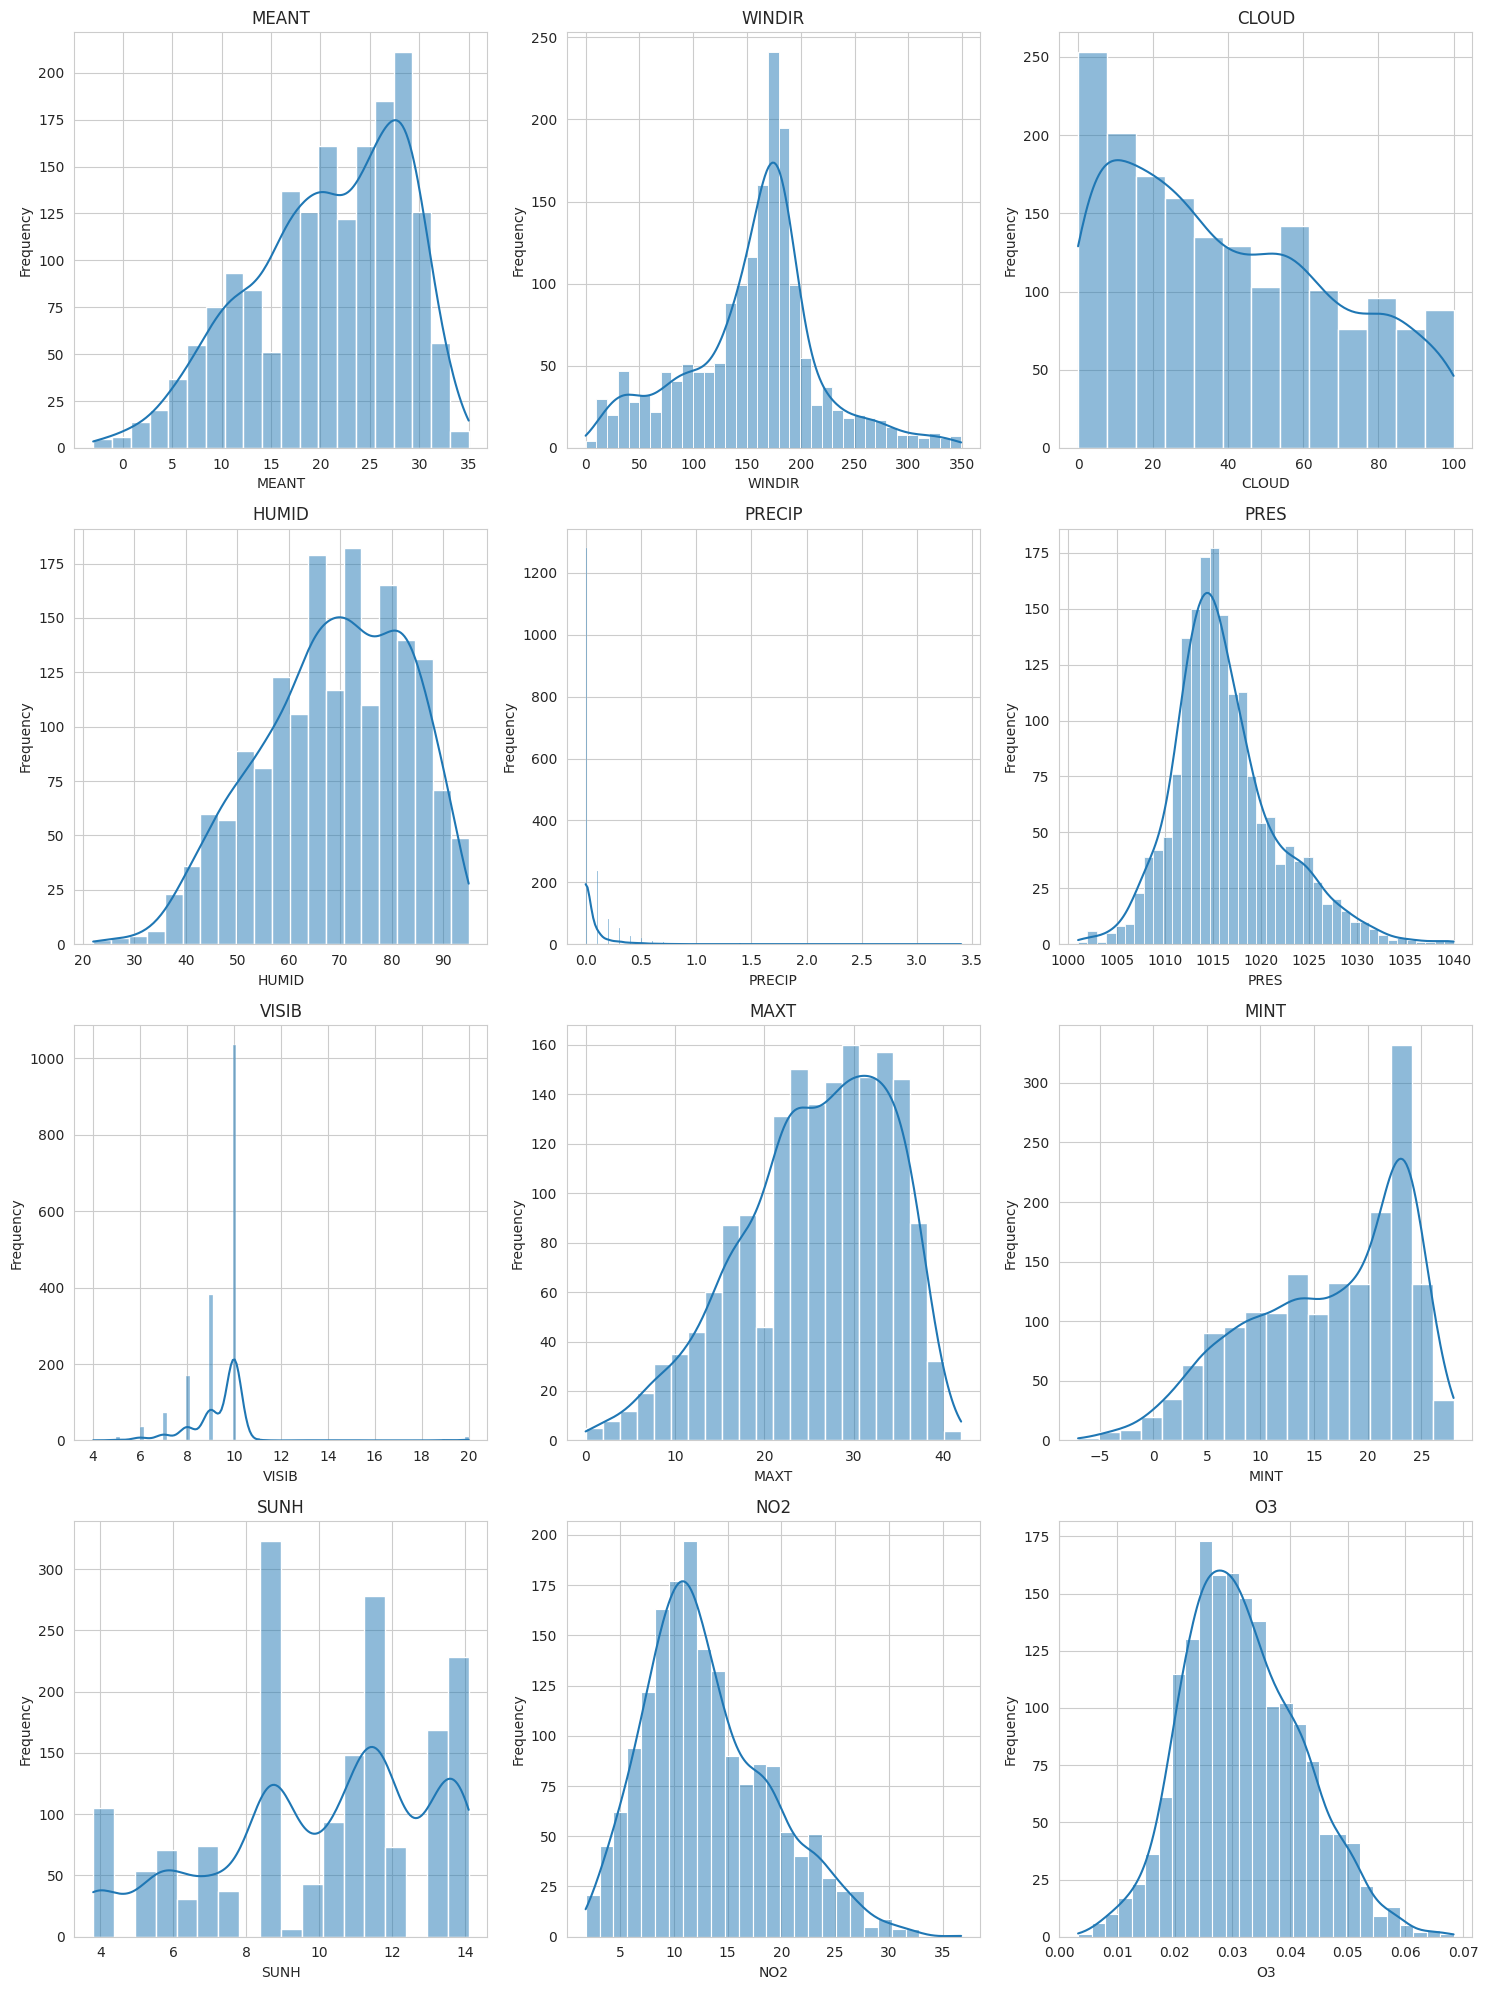

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns = [
    "MEANT", "WINDIR", "CLOUD", "HUMID",
    "PRECIP", "PRES", "VISIB", "MAXT",
    "MINT", "SUNH", "NO2", "O3"
]

# Define the number of columns and rows for the subplots
num_columns = 3  # Number of columns in the subplot grid
num_rows = (len(columns) + num_columns - 1) // num_columns  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms with KDE for each column
for ax, column in zip(axes, columns):
    sns.histplot(data=df, x=column, ax=ax, kde=True)
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Hide any unused axes
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


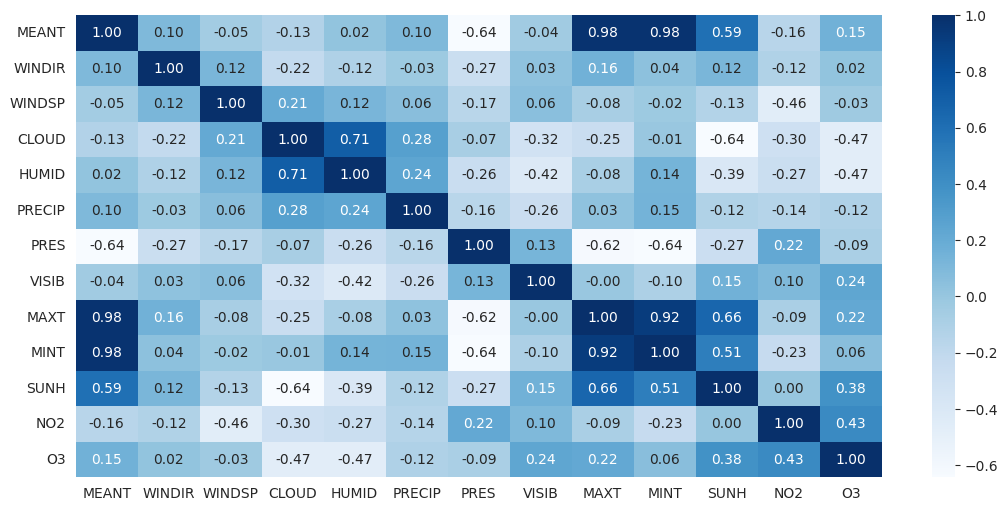

In [10]:
plt.figure(figsize=(13, 6))
sns.heatmap(df.select_dtypes('number').corr(), cmap='Blues', annot=True, fmt='.2f');

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf

df = df[['MEANT', 'CLOUD', 'HUMID', 'PRES', 'MAXT', 'SUNH', 'NO2','O3']]

train_size = int(len(df) * 0.8)
dl_train, dl_test = df.iloc[:train_size], df.iloc[train_size:]
print(f"Train - dataset size: {len(dl_train):.2f}")
print(f"Test - dataset size: {len(dl_test):.2f}")


Train - dataset size: 1387.00
Test - dataset size: 347.00


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
import plotly.subplots as sp

# Perform seasonal decomposition
result = seasonal_decompose(df['O3'], model='additive', period=365)

# Create subplots for the decomposed components
fig = sp.make_subplots(
    rows=4, cols=1, shared_xaxes=True,
    subplot_titles=['Observed', 'Trend', 'Seasonal', 'Residual']
)

# Add traces for each component
fig.add_trace(go.Scatter(x=df.index, y=result.observed, mode='lines', name='Observed'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.trend, mode='lines', name='Trend'), row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.seasonal, mode='lines', name='Seasonal'), row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=result.resid, mode='lines', name='Residual'), row=4, col=1)

# Update layout with the correct template
fig.update_layout(
    template='plotly',
    height=800,
    title='O3',
    title_x=0.5
)

# Show the figure
fig.show()

In [47]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Initialize scalers
robust_scaler = RobustScaler()
target_transformer = MinMaxScaler()

# Define feature columns and target
feature_columns = ['MEANT', 'CLOUD', 'HUMID', 'MAXT', 'SUNH', 'NO2']
target_column = "O3"

# Fit and transform training data
dl_train[feature_columns] = robust_scaler.fit_transform(dl_train[feature_columns])
dl_train[target_column] = target_transformer.fit_transform(dl_train[[target_column]])  # target

# Transform test data using the same scalers
dl_test[feature_columns] = robust_scaler.transform(dl_test[feature_columns])
dl_test[target_column] = target_transformer.transform(dl_test[[target_column]])  # target


In [48]:
! pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [49]:
sequence_length = 7
X_train, y_train = create_dataset(dl_train, dl_train['O3'], sequence_length)
X_test, y_test = create_dataset(dl_test, dl_test['O3'], sequence_length)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the GRU model
gru_model = Sequential()
gru_model.add(GRU(100, activation='tanh', recurrent_activation='relu', input_shape=(sequence_length, X_train.shape[2])))
gru_model.add(Dense(1, activation='relu'))  # Applying ReLU to the Dense layer output
gru_model.compile(optimizer='adam', loss='mse')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = gru_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = gru_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - loss: 0.0314 - val_loss: 0.0178
Epoch 2/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0125 - val_loss: 0.0123
Epoch 3/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0120 - val_loss: 0.0131
Epoch 4/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0096 - val_loss: 0.0158
Epoch 5/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0094 - val_loss: 0.0229
Epoch 6/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0097 - val_loss: 0.0104
Epoch 7/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0105 - val_loss: 0.0124
Epoch 8/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0093 - val_loss: 0.0106
Epoch 9/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0088 - val_loss: 0.0112
Epoch 10/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 0.0091 - val_loss: 0.0112
Epoch 11/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0096 - val_loss: 0.0120
Epoch 12/30
1380/1380 

In [51]:
gru_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                          │ (None, 100)                 │          33,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,305 (387.91 KB)

 Trainable params: 33,101 (129.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 66,204 (258.61 KB)

In [52]:
gru_pred = gru_model.predict(X_test)
gru_pred = target_transformer.inverse_transform(gru_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


RMSE: 0.10
R2 Score: 0.52


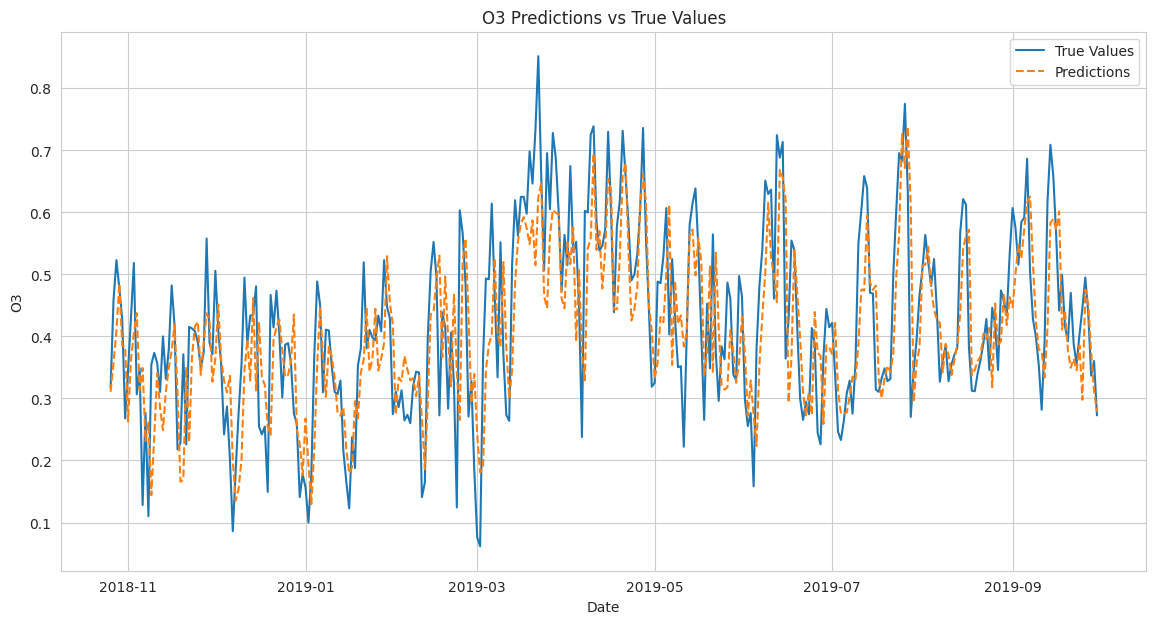

In [55]:
# Calculate RMSE and R2 scores
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, gru_pred))
r2 = r2_score(y_test, gru_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], gru_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('O3')
plt.title('O3 Predictions vs True Values')
plt.legend()
plt.show()

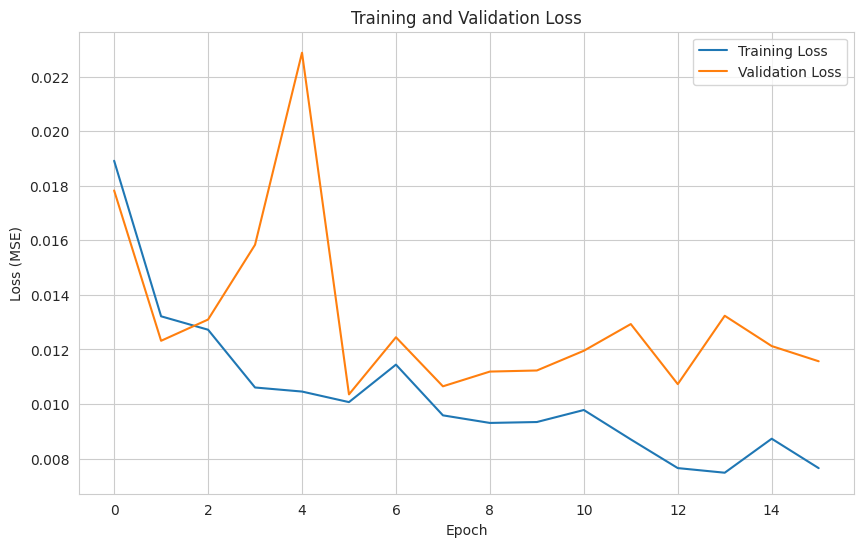

In [56]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
lstm_model.add(Dense(1, activation='relu'))  # Applying ReLU to the Dense layer output
lstm_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = lstm_model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0254 - val_loss: 0.0133
Epoch 2/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0117 - val_loss: 0.0115
Epoch 3/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0109 - val_loss: 0.0120
Epoch 4/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0098 - val_loss: 0.0108
Epoch 5/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0099 - val_loss: 0.0123
Epoch 6/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0105 - val_loss: 0.0128
Epoch 7/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0091 - val_loss: 0.0101
Epoch 8/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0092 - val_loss: 0.0103
Epoch 9/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0089 - val_loss: 0.0103
Epoch 10/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0085 - val_loss: 0.0101
Epoch 11/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0086 - val_loss: 0.0099
Epoch 12/30
1380/1380 ━━━━

In [58]:
lstm_pred = lstm_model.predict(X_test)
lstm_pred = target_transformer.inverse_transform(lstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [59]:
lstm_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          43,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,105 (512.13 KB)

 Trainable params: 43,701 (170.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 87,404 (341.43 KB)

RMSE: 0.10
R2 Score: 0.54


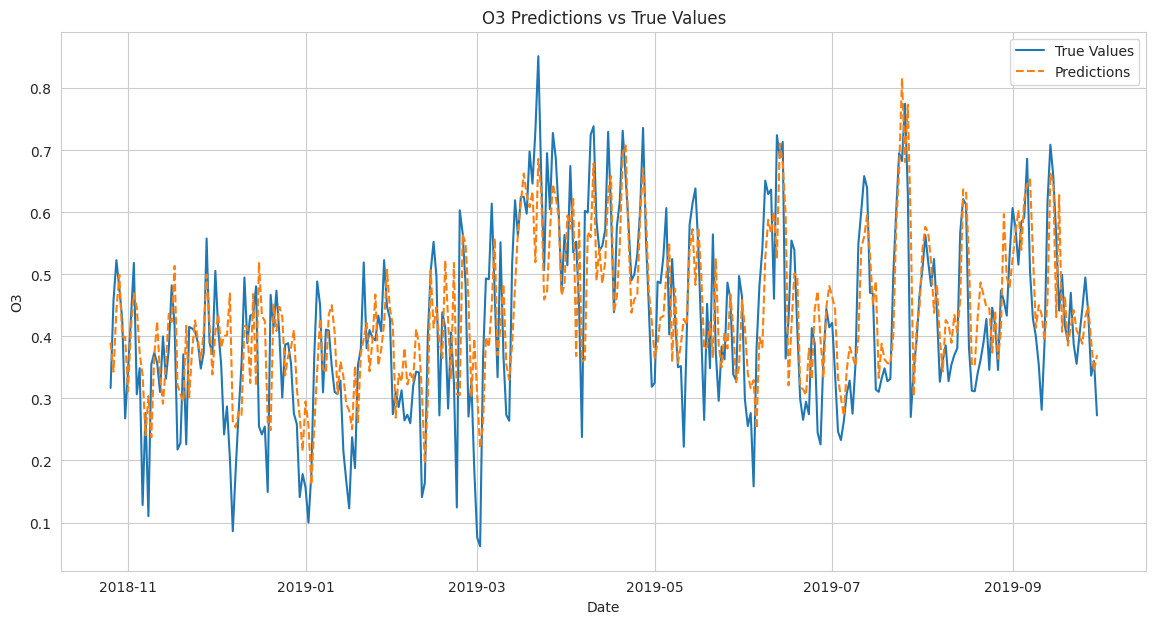

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, lstm_pred))
r2 = r2_score(y_test, lstm_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], lstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('O3')
plt.title('O3 Predictions vs True Values')
plt.legend()
plt.show()

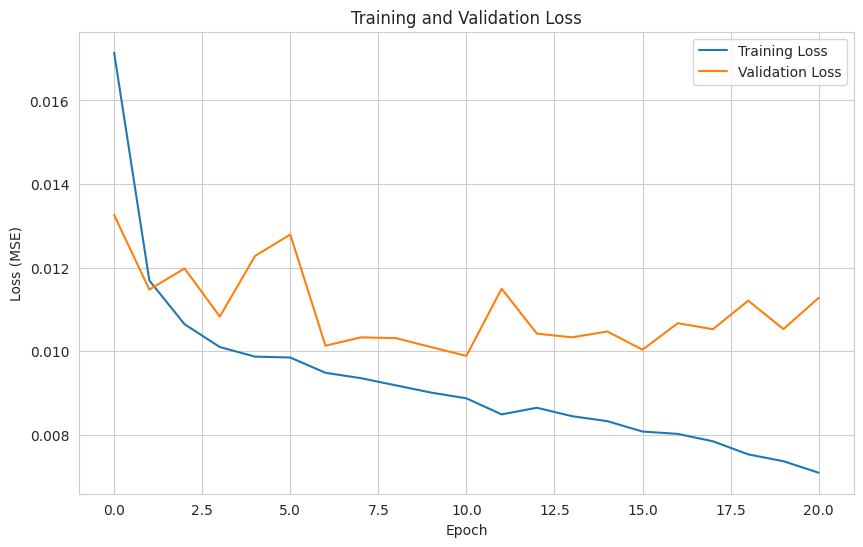

In [61]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh', input_shape=(sequence_length, X_train.shape[2]))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=1, callbacks=[early_stopping])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Validation Loss: {loss}')

Epoch 1/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - loss: 0.0275 - val_loss: 0.0163
Epoch 2/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0121 - val_loss: 0.0119
Epoch 3/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0107 - val_loss: 0.0136
Epoch 4/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 0.0109 - val_loss: 0.0118
Epoch 5/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0101 - val_loss: 0.0123
Epoch 6/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 0.0095 - val_loss: 0.0110
Epoch 7/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0093 - val_loss: 0.0106
Epoch 8/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 0.0100 - val_loss: 0.0107
Epoch 9/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 0.0093 - val_loss: 0.0138
Epoch 10/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0088 - val_loss: 0.0121
Epoch 11/30
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0090 - val_loss: 0.0100
Epoch 12/30
1380/

In [64]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (1, 200)                    │          87,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (1, 1)                      │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 262,205 (1.00 MB)

 Trainable params: 87,401 (341.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 174,804 (682.83 KB)

In [65]:
# Make predictions
bilstm_pred = model.predict(X_test)
bilstm_pred = target_transformer.inverse_transform(bilstm_pred)  # Inverse transform to original scale

# Inverse transform the true values for comparison
y_test = y_test.reshape(-1, 1)
y_test = target_transformer.inverse_transform(y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


RMSE: 0.10
R2 Score: 0.54


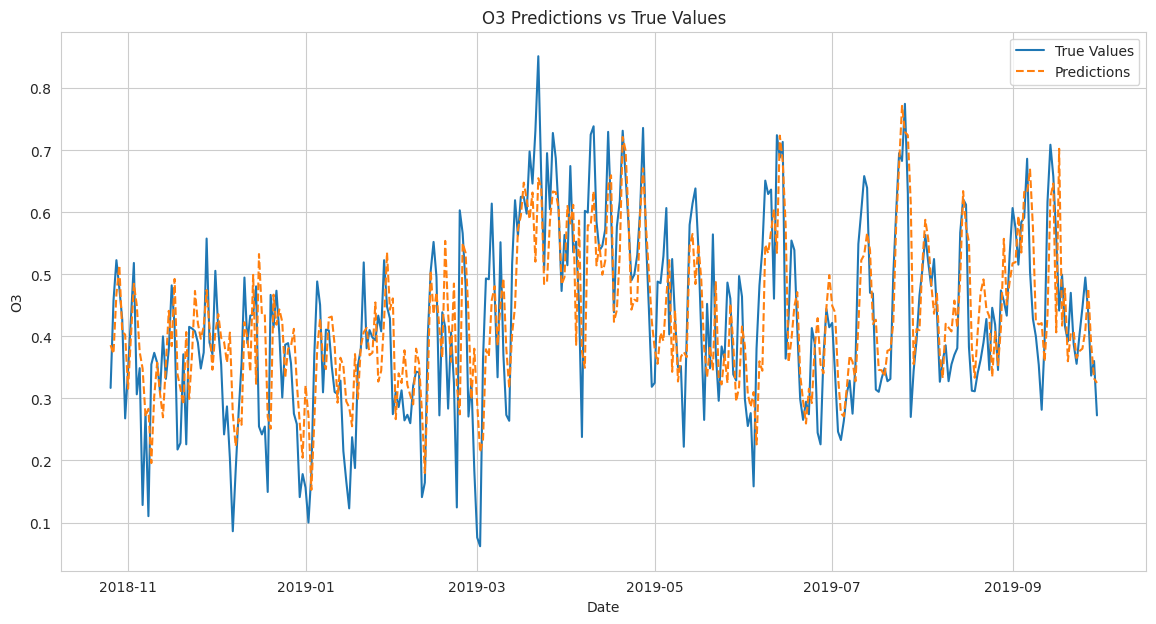

In [66]:
rmse = np.sqrt(mean_squared_error(y_test, bilstm_pred))
r2 = r2_score(y_test, bilstm_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')


plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='True Values')
plt.plot(df.index[-len(y_test):], bilstm_pred, label='Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('O3')
plt.title('O3 Predictions vs True Values')
plt.legend()
plt.show()

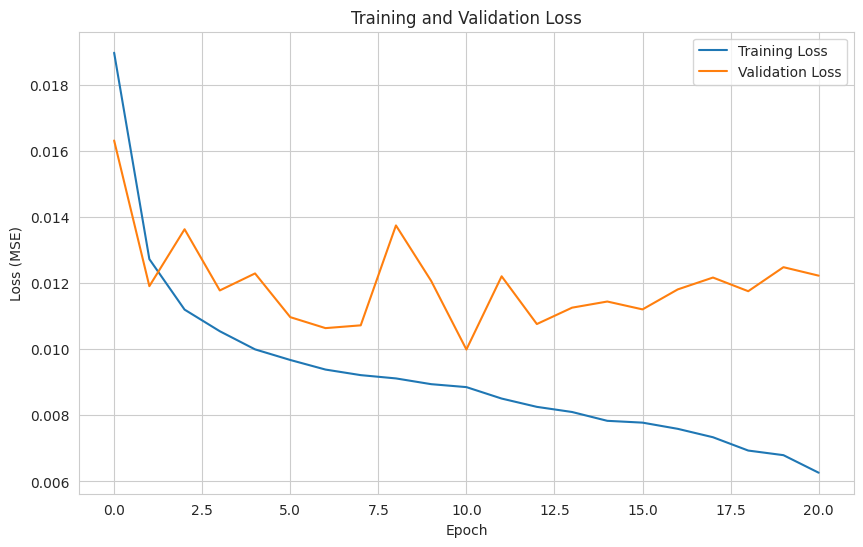

In [67]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot loss values over epochs
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()